<a href="https://colab.research.google.com/github/grishabh04/Rossmann_Sales_Pediction-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Importing important libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

Mounting Drive

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing sales data as Sales_df

In [252]:
sales_df=pd.read_csv('/content/drive/MyDrive/ CAPSTONE PROJECT REGRESSION/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Exploring data in sales_df

In [253]:
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [254]:
sales_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [255]:
print('NO of rows = '+ str(sales_df.shape[0]))
print('NO of columns = '+ str(sales_df.shape[1]))

NO of rows = 1017209
NO of columns = 9


**to remove closed day data**
where open==0 remove

In [256]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [257]:
# exploring Target variable (Sales)
sales_df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

Sales is continuous variable 

All the columns are int type except Date and State Holiday and there are no null values

Date and StateHoliday are object type so lets explore this columns

In [258]:
# let us see value counts of date
sales_df['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

convert date from object todate type
extract date day and year (3 columns)
drop date

In [259]:
# #It seems Date column has huge amount of rows containing 0
# #let us see what % of data has 0 as date
# print('percentage of dates being 0 ='+ str((sales_df['Date'].value_counts()[0]/sales_df.shape[0])*100))

In [260]:
# sales_df.drop(columns=['Date'],axis=1,inplace=True)

In [261]:
#let us see value counts of StateHoliday 
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

We could see StateHoliday is showing 0 two times means it  would also be in string type

In [262]:
#let us check
sales_df[sales_df['StateHoliday']=='0']

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016090,1111,3,2013-01-02,5097,505,1,0,0,1
1016091,1112,3,2013-01-02,10797,892,1,0,0,1
1016092,1113,3,2013-01-02,6218,753,1,0,0,1
1016093,1114,3,2013-01-02,20642,3401,1,0,0,1


We found '0' is stored as string so lets convert

In [263]:
#let us convert '0' to 0
sales_df['StateHoliday'][sales_df['StateHoliday']=='0']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [264]:
sales_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

We could see state holidays are categorical we should convert into numerical

Now we can see State Holiday has values(0,a,b,c)
lets do one hot coding on this to make separate column for each 

In [265]:
sales_df = pd.get_dummies(sales_df, columns=["StateHoliday"],drop_first=True)

In [266]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,0


Now deleting rows from the column Open which have value 0. 

In [267]:
sales_df.drop(sales_df.index[sales_df['Open'] == 0], inplace = True)

In [268]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,0,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,0,0


As seen above date column is of object type, so converted it into datetime. 

In [269]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [270]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           844392 non-null  int64         
 1   DayOfWeek       844392 non-null  int64         
 2   Date            844392 non-null  datetime64[ns]
 3   Sales           844392 non-null  int64         
 4   Customers       844392 non-null  int64         
 5   Open            844392 non-null  int64         
 6   Promo           844392 non-null  int64         
 7   SchoolHoliday   844392 non-null  int64         
 8   StateHoliday_a  844392 non-null  uint8         
 9   StateHoliday_b  844392 non-null  uint8         
 10  StateHoliday_c  844392 non-null  uint8         
dtypes: datetime64[ns](1), int64(7), uint8(3)
memory usage: 60.4 MB


Extracting date, month, year from date column.

In [271]:
sales_df['date'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df['month'] = pd.DatetimeIndex(sales_df['Date']).month
sales_df['year'] = pd.DatetimeIndex(sales_df['Date']).year


In [272]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
0,1,5,2015-07-31,5263,555,1,1,1,0,0,0,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,1,0,0,0,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,1,0,0,0,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,1,0,0,0,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,1,0,0,0,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,0,0,1,1,2013
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,0,0,1,1,2013
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,0,0,1,1,2013
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,0,0,1,1,2013


Describing sales_dF

In [297]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,date,month,year
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580,0.000822,0.000172,0.000084,15.835683,5.845738,2013.831937
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103,0.028657,0.013103,0.009169,8.683456,3.323931,0.777260
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,2013.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,6.000000,2014.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,23.000000,8.000000,2014.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2015.000000


Lets see distribution of data in each feature

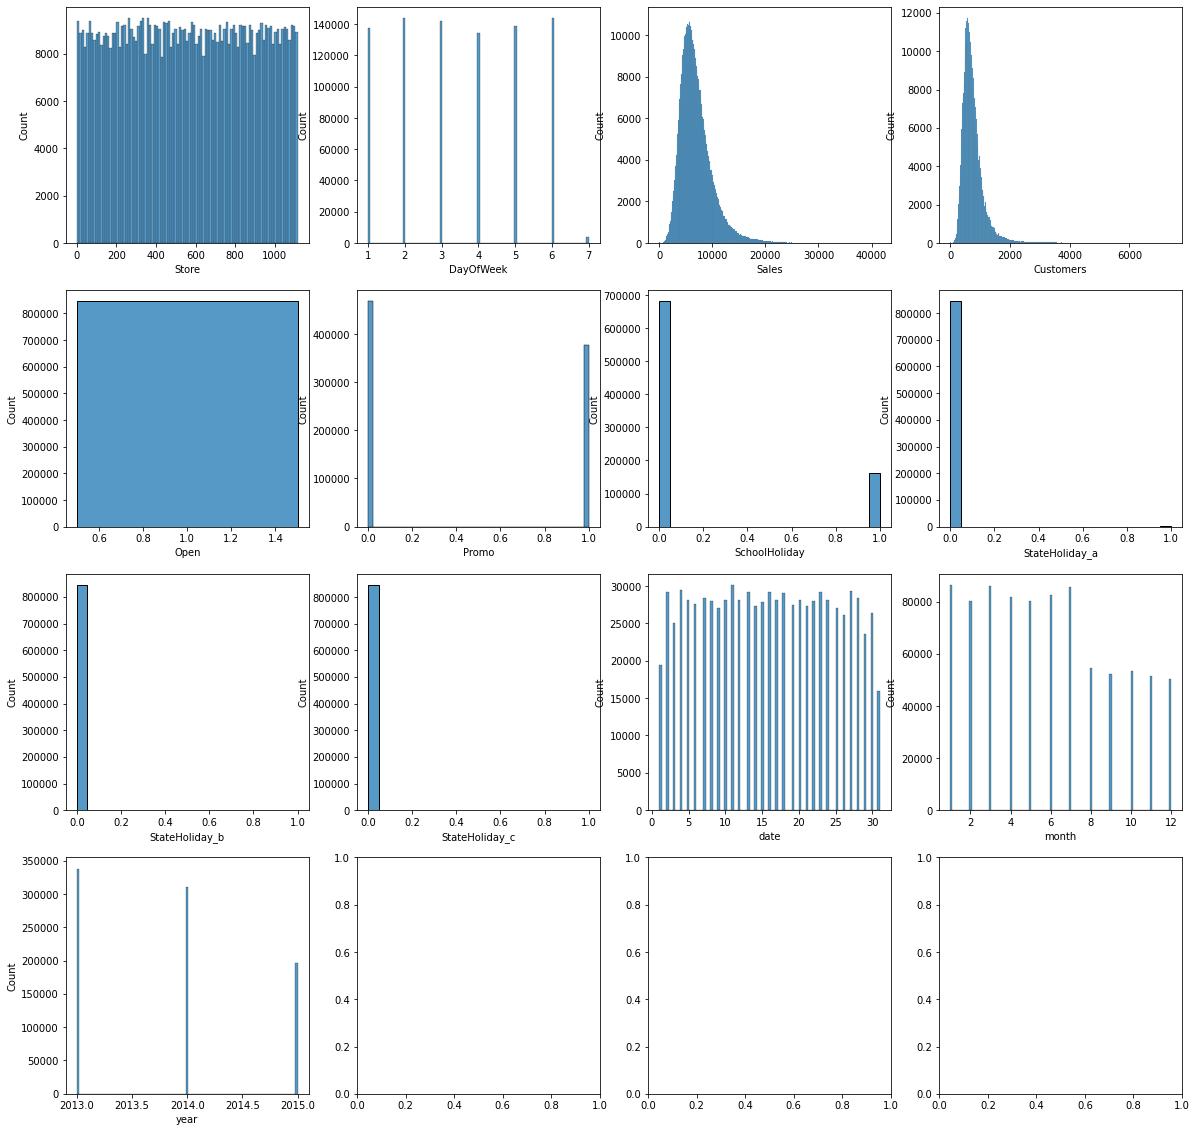

In [298]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(sales_df.describe().columns):
 sns.histplot(sales_df[col],ax=axes[i//4,i%4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

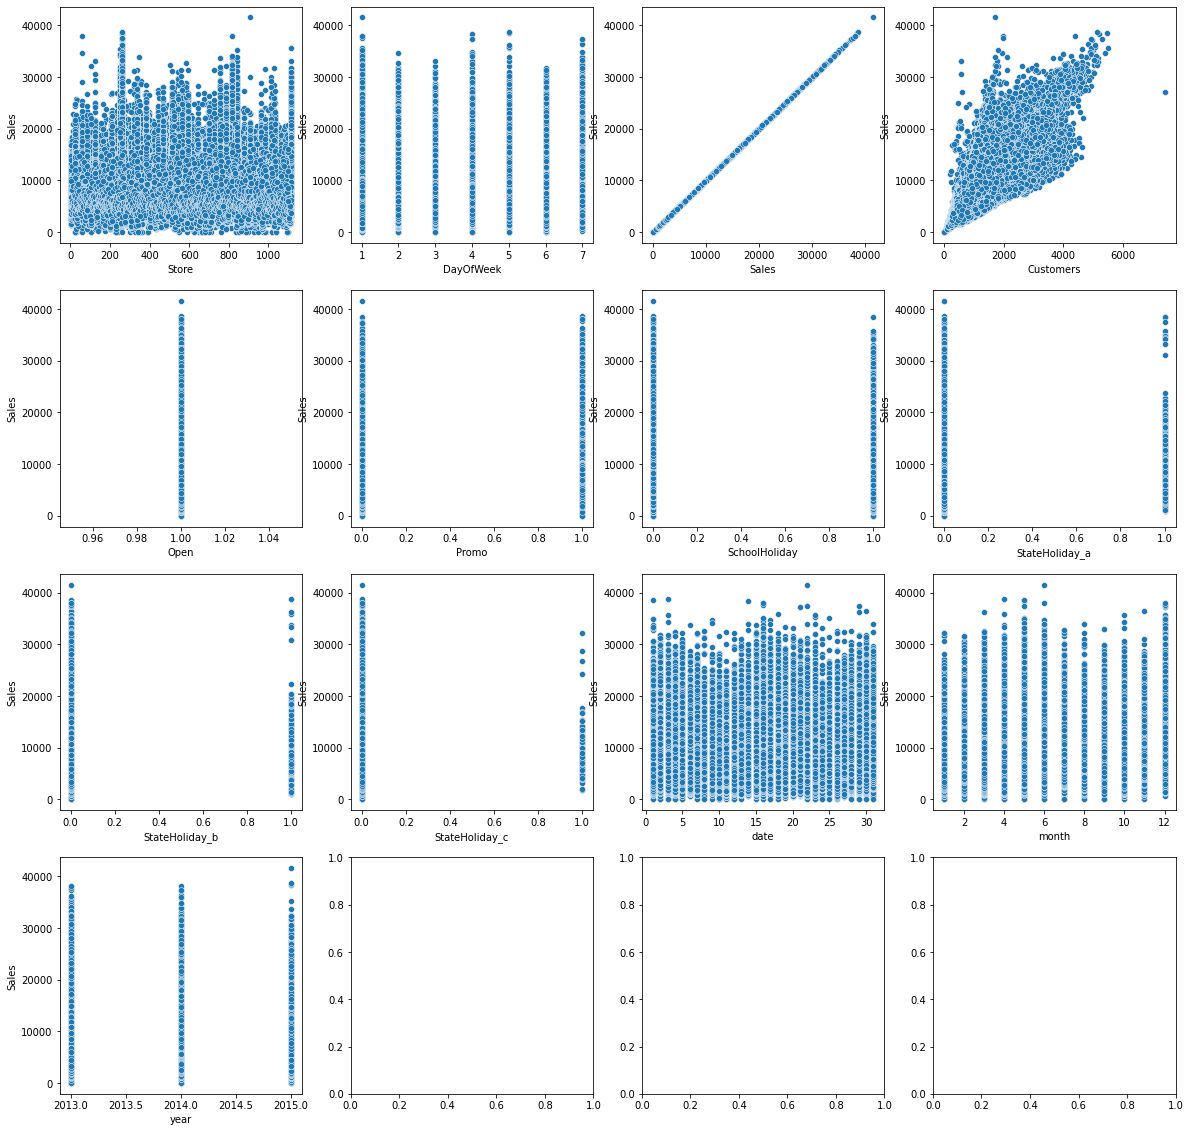

In [275]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(sales_df.describe().columns):
 sns.scatterplot(sales_df[col],sales_df['Sales'],ax=axes[i//4,i%4])

Lets see our other suplementary table Store 

In [276]:
store_df=pd.read_csv('/content/drive/MyDrive/ CAPSTONE PROJECT REGRESSION/store.csv')

In [277]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [278]:
store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [279]:
store_df.shape

(1115, 10)

In [280]:
print('NO of rows = '+ str(store_df.shape[0]))
print('NO of columns = '+ str(store_df.shape[1]))

NO of rows = 1115
NO of columns = 10


In [281]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


StoreType,Assortment,PromoInterval are object type lets explore them


In [282]:
# lets see value counts of StoreType
store_df['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [283]:
#Lets do one hot encoding on column StoreType and convert to (0,1) 
store_df = pd.get_dummies(store_df, columns=["StoreType"],drop_first=True)

In [284]:
store_df.head(5)

,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d
0,1,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,1,0
1,2,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0
2,3,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0
3,4,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,1,0
4,5,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,0


In [285]:
# lets see value count of assortment 
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [286]:
# one hot encoding on Assortment
store_df=pd.get_dummies(store_df,columns=['Assortment'],drop_first=True)


In [287]:
store_df

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,1,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
3,4,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,1,0,0,1
4,5,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0,0,0,0,0
1111,1112,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0,1,0,0,1
1112,1113,9260.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,1
1113,1114,870.0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,1


In [288]:
#value counts of PromoInterval
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

Promo Interval has 3 categories so lets do one hot encoding

In [289]:
store_df=pd.get_dummies(store_df,columns=['PromoInterval'],drop_first=True)

Now lets replace Null(NaN) values


In [290]:
# Replacing null values with 0
store_df.fillna(0,inplace=True)

In [291]:
store_df.head(4)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,1270.0,9.0,2008.0,0,0.0,0.0,0,1,0,0,0,0,0
1,2,570.0,11.0,2007.0,1,13.0,2010.0,0,0,0,0,0,1,0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0,0,0,0,0,0,1,0
3,4,620.0,9.0,2009.0,0,0.0,0.0,0,1,0,0,1,0,0


In [292]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462,0.015247,0.132735,0.312108,0.008072,0.460090,0.300448,0.095067
std,322.01708,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782,0.122587,0.339441,0.463561,0.089520,0.498628,0.458659,0.293439
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribution of data in features

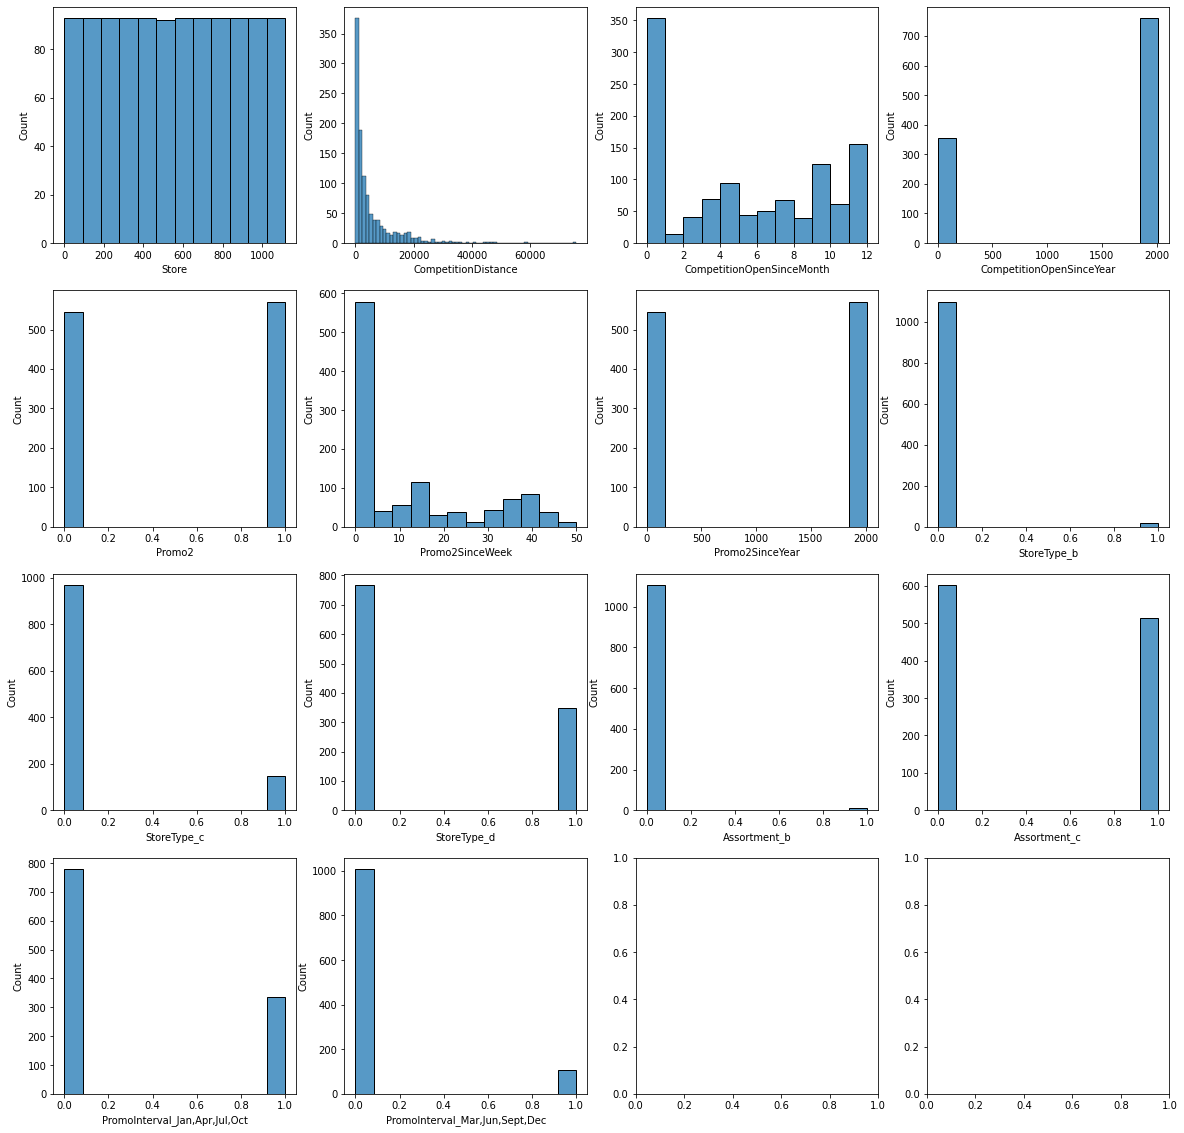

In [293]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
for i,col in enumerate(store_df.describe().columns): 
 sns.histplot(store_df[col],ax=axes[i//4,i%4])


Now lets merge both the data frames 

In [294]:
new_df=sales_df.merge(store_df,how='inner',left_on='Store',right_on='Store')



In [295]:
new_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'date', 'month', 'year', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

lets see distribution of data

IndexError: ignored

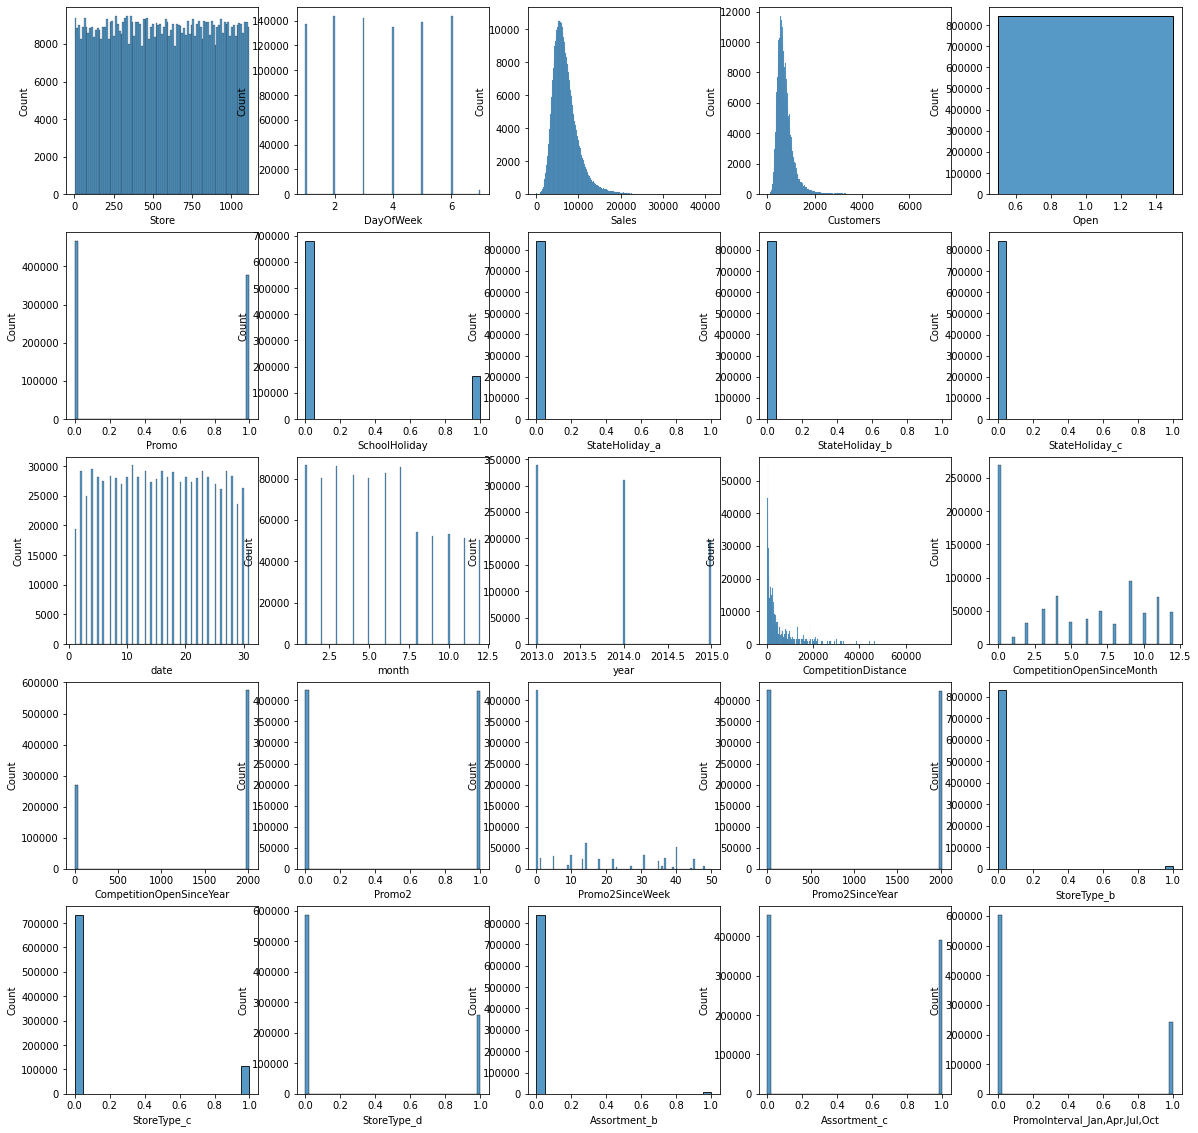

In [296]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))
for i,col in enumerate(new_df.describe().columns): 
 sns.histplot(new_df[col],ax=axes[i//5,i%5])

lets see correlation matrix

In [ ]:
correlations = new_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

In [ ]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))
for i,col in enumerate(new_df.describe().columns):
 sns.scatterplot(new_df[col],new_df['Sales'],ax=axes[i//5,i%5])

Now lets divide dependent var and independent var

In [ ]:
#storing dependent variables in 
y=new_df['Sales']

In [ ]:
#storing independent variables in X
new_df.drop(columns=['Sales'],axis=1,inplace=True)

In [ ]:
x=new_df

In [ ]:
x

Now lets split the data in training and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

**Now let us use some models and finds which model is fitting with data**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Let us implement Regularised  Linear regression through lasso 


In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-3,1e-2,1e-1,1,5,10,15,20,25]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=4)#hyperparameter tunning and cross validation
lasso_regressor.fit(x_train,y_train)